In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

print("✅ All libraries imported successfully")

✅ All libraries imported successfully


## 2. Load & Clean Data

In [62]:
df = pd.read_csv("data_set.csv")

print("\n📊 Dataset Shape:", df.shape)
print("\n📋 Data Types:\n", df.dtypes)

initial_rows = len(df)
df = df.drop_duplicates()
removed_rows = initial_rows - len(df)

print(f"\n✅ Duplicates Removed: {removed_rows} rows")
print(f"   Dataset Shape After Cleaning: {df.shape}")

print("\n❓ Missing Values:\n", df.isnull().sum())
df = df.fillna(0)

target_col = df.columns[-1]
feature_columns = df.columns[:-1]

for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.fillna(0)

print(f"\n✅ Data Preprocessing Complete")
print(f"   Target Column: {target_col}")
print(f"   Number of Features: {len(feature_columns)}")


📊 Dataset Shape: (5241, 17)

📋 Data Types:
 Forward Packets                                    int64
Forward Bytes                                      int64
Delta Forward Packets                              int64
Delta Forward Bytes                                int64
Forward Instantaneous Packets per Second         float64
Forward Average Packets per second               float64
Forward Instantaneous Bytes per Second             int64
Forward Average Bytes per second                 float64
Reverse Packets                                    int64
Reverse Bytes                                      int64
Delta Reverse Packets                              int64
Delta Reverse Bytes                                int64
DeltaReverse Instantaneous Packets per Second    float64
Reverse Average Packets per second               float64
Reverse Instantaneous Bytes per Second             int64
Reverse Average Bytes per second                 float64
Traffic Type                               

## 3. Encode Labels & Feature-Target Split

In [ ]:
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

print("\n📋 Class Mapping:")
for i, cls in enumerate(le.classes_):
    print(f"   {cls} → {i}")

X = df[list(feature_columns)]
y = df[target_col]

print(f"\n✅ Features Shape: {X.shape}")
print(f"   Target Shape: {y.shape}")


📋 Class Mapping:
   dns → 0
   ping → 1
   telnet → 2
   voice → 3

✅ Features Shape: (5240, 16)
   Target Shape: (5240,)


## 4. Train-Test Split & Feature Scaling

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n✅ Train-Test Split Complete")
print(f"   Training Samples: {X_train.shape[0]}")
print(f"   Testing Samples: {X_test.shape[0]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Features Scaled Successfully")


✅ Train-Test Split Complete
   Training Samples: 4192
   Testing Samples: 1048

✅ Features Scaled Successfully


## 5. Train Individual Models

In [ ]:

dt_model = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average="weighted")
dt_recall = recall_score(y_test, dt_pred, average="weighted")
dt_f1 = f1_score(y_test, dt_pred, average="weighted")

print(f"\n📊 Decision Tree Metrics:")
print(f"   Accuracy:  {dt_accuracy:.4f}")
print(f"   Precision: {dt_precision:.4f}")
print(f"   Recall:    {dt_recall:.4f}")
print(f"   F1 Score:  {dt_f1:.4f}")


🌳 DECISION TREE CLASSIFIER

📊 Decision Tree Metrics:
   Accuracy:  0.9981
   Precision: 0.9981
   Recall:    0.9981
   F1 Score:  0.9981


In [ ]:


rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average="weighted")
rf_recall = recall_score(y_test, rf_pred, average="weighted")
rf_f1 = f1_score(y_test, rf_pred, average="weighted")

print(f"\n📊 Random Forest Metrics:")
print(f"   Accuracy:  {rf_accuracy:.4f}")
print(f"   Precision: {rf_precision:.4f}")
print(f"   Recall:    {rf_recall:.4f}")
print(f"   F1 Score:  {rf_f1:.4f}")


🌲 RANDOM FOREST CLASSIFIER

📊 Random Forest Metrics:
   Accuracy:  0.9981
   Precision: 0.9981
   Recall:    0.9981
   F1 Score:  0.9981

📊 Random Forest Metrics:
   Accuracy:  0.9981
   Precision: 0.9981
   Recall:    0.9981
   F1 Score:  0.9981


In [ ]:

ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=8),
    n_estimators=200,
    learning_rate=1.0,
    random_state=42
)

ada_model.fit(X_train_scaled, y_train)
ada_pred = ada_model.predict(X_test_scaled)

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred, average="weighted")
ada_recall = recall_score(y_test, ada_pred, average="weighted")
ada_f1 = f1_score(y_test, ada_pred, average="weighted")

print(f"\n📊 AdaBoost Metrics:")
print(f"   Accuracy:  {ada_accuracy:.4f}")
print(f"   Precision: {ada_precision:.4f}")
print(f"   Recall:    {ada_recall:.4f}")
print(f"   F1 Score:  {ada_f1:.4f}")


🚀 ADA BOOST CLASSIFIER

📊 AdaBoost Metrics:
   Accuracy:  0.9990
   Precision: 0.9990
   Recall:    0.9990
   F1 Score:  0.9990

📊 AdaBoost Metrics:
   Accuracy:  0.9990
   Precision: 0.9990
   Recall:    0.9990
   F1 Score:  0.9990


## 6. Individual Model Comparison


📊 INDIVIDUAL MODEL COMPARISON

        Model  Accuracy  Precision   Recall  F1 Score
Decision Tree  0.998092   0.998096 0.998092  0.998092
Random Forest  0.998092   0.998098 0.998092  0.998091
     AdaBoost  0.999046   0.999050 0.999046  0.999046


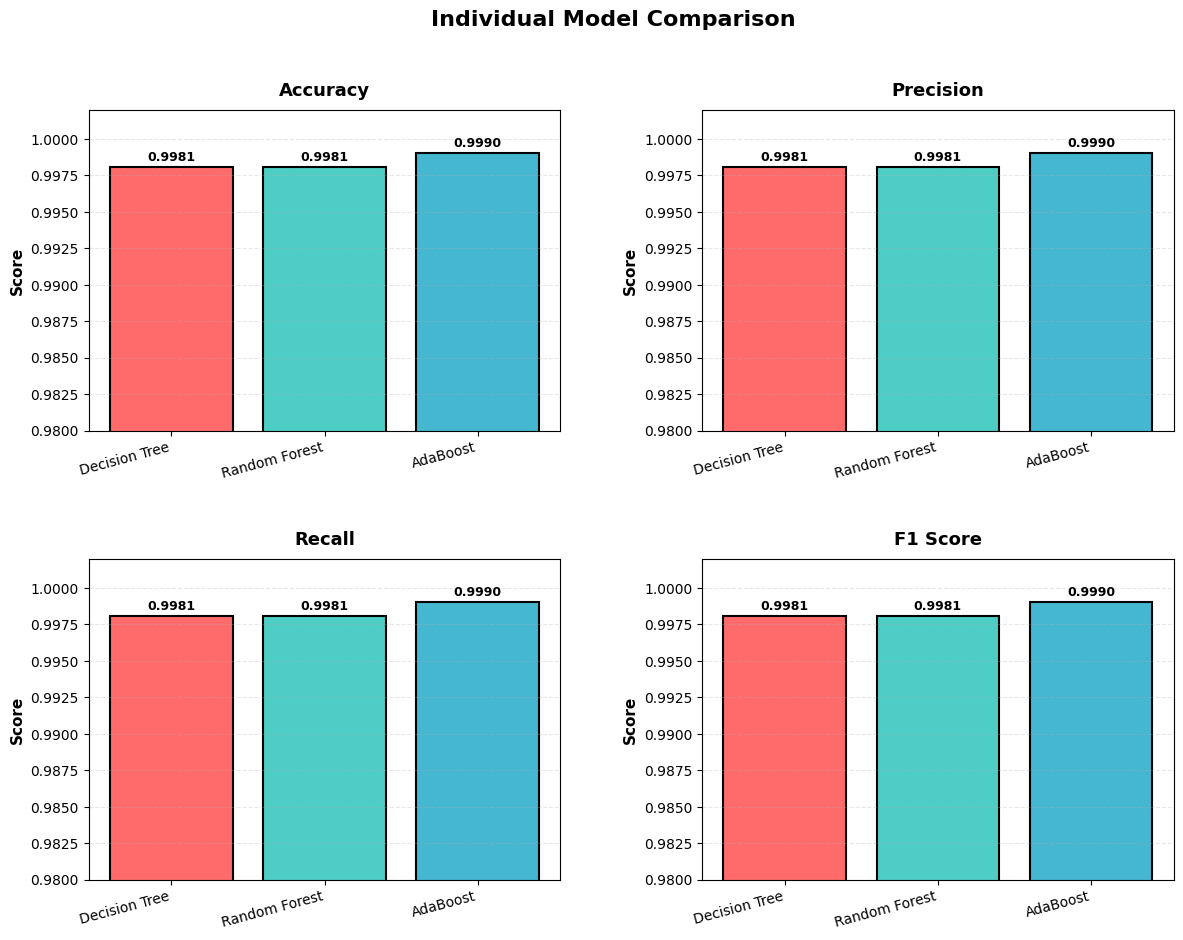

In [75]:
# ================================
# 12. COMPARE INDIVIDUAL MODELS
# ================================
print("\n" + "="*50)
print("📊 INDIVIDUAL MODEL COMPARISON")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost'],
    'Accuracy': [dt_accuracy, rf_accuracy, ada_accuracy],
    'Precision': [dt_precision, rf_precision, ada_precision],
    'Recall': [dt_recall, rf_recall, ada_recall],
    'F1 Score': [dt_f1, rf_f1, ada_f1]
})

print("\n" + comparison_df.to_string(index=False))

# Visualize comparison
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)
fig.suptitle('Individual Model Comparison', fontsize=16, fontweight='bold', y=0.98)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = comparison_df['Model'].tolist()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    bars = ax.bar(range(len(models)), comparison_df[metric].values, color=colors, edgecolor='black', linewidth=1.5)
    ax.set_title(metric, fontsize=13, fontweight='bold', pad=10)
    ax.set_ylabel('Score', fontsize=11, fontweight='bold')
    ax.set_ylim([0.98, 1.002])
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=15, ha='right', fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    for i, (bar, v) in enumerate(zip(bars, comparison_df[metric].values)):
        ax.text(bar.get_x() + bar.get_width()/2, v + 0.0002, f'{v:.4f}', 
                ha='center', fontweight='bold', fontsize=9, va='bottom')

plt.show()

## 7. Ensemble Model (Voting Classifier)

In [ ]:

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

print(f"\n📊 Base Model Accuracies:")
print(f"   Decision Tree: {dt_accuracy:.4f}")
print(f"   Random Forest: {rf_accuracy:.4f}")
print(f"   AdaBoost:      {ada_accuracy:.4f}")

base_learners = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=12, min_samples_split=8, 
                                             min_samples_leaf=4, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=15, 
                                            min_samples_split=10, min_samples_leaf=4, 
                                            n_jobs=-1, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                                   n_estimators=150, learning_rate=0.8, random_state=42)),
    ('SVM', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance'))
]

meta_learner = LogisticRegression(max_iter=1000, random_state=42, C=0.1)

ensemble_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=False
)

ensemble_model.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_model.predict(X_test_scaled)

ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred, average="weighted")
ensemble_recall = recall_score(y_test, ensemble_pred, average="weighted")
ensemble_f1 = f1_score(y_test, ensemble_pred, average="weighted")

print(f"\n📊 Diverse Stacking Ensemble Metrics:")
print(f"   Accuracy:  {ensemble_accuracy:.4f}")
print(f"   Precision: {ensemble_precision:.4f}")
print(f"   Recall:    {ensemble_recall:.4f}")
print(f"   F1 Score:  {ensemble_f1:.4f}")
print(f"\n💡 Note: 5 diverse base learners (DT, RF, AdaBoost, SVM, KNN) with LR meta-learner")


🎯 DIVERSE ENSEMBLE MODEL (STACKING)

📊 Base Model Accuracies:
   Decision Tree: 0.9981
   Random Forest: 0.9981
   AdaBoost:      0.9990

📊 Diverse Stacking Ensemble Metrics:
   Accuracy:  0.9990
   Precision: 0.9990
   Recall:    0.9990
   F1 Score:  0.9990

💡 Note: 5 diverse base learners (DT, RF, AdaBoost, SVM, KNN) with LR meta-learner

📊 Diverse Stacking Ensemble Metrics:
   Accuracy:  0.9990
   Precision: 0.9990
   Recall:    0.9990
   F1 Score:  0.9990

💡 Note: 5 diverse base learners (DT, RF, AdaBoost, SVM, KNN) with LR meta-learner


## 8. Final Results & Model Comparison


           Model  Accuracy  Precision   Recall  F1 Score
   Decision Tree  0.998092   0.998096 0.998092  0.998092
   Random Forest  0.998092   0.998098 0.998092  0.998091
        AdaBoost  0.999046   0.999050 0.999046  0.999046
Diverse Ensemble  0.999046   0.999050 0.999046  0.999046

🏅 Best Model: Diverse Ensemble
   F1 Score: 0.9990


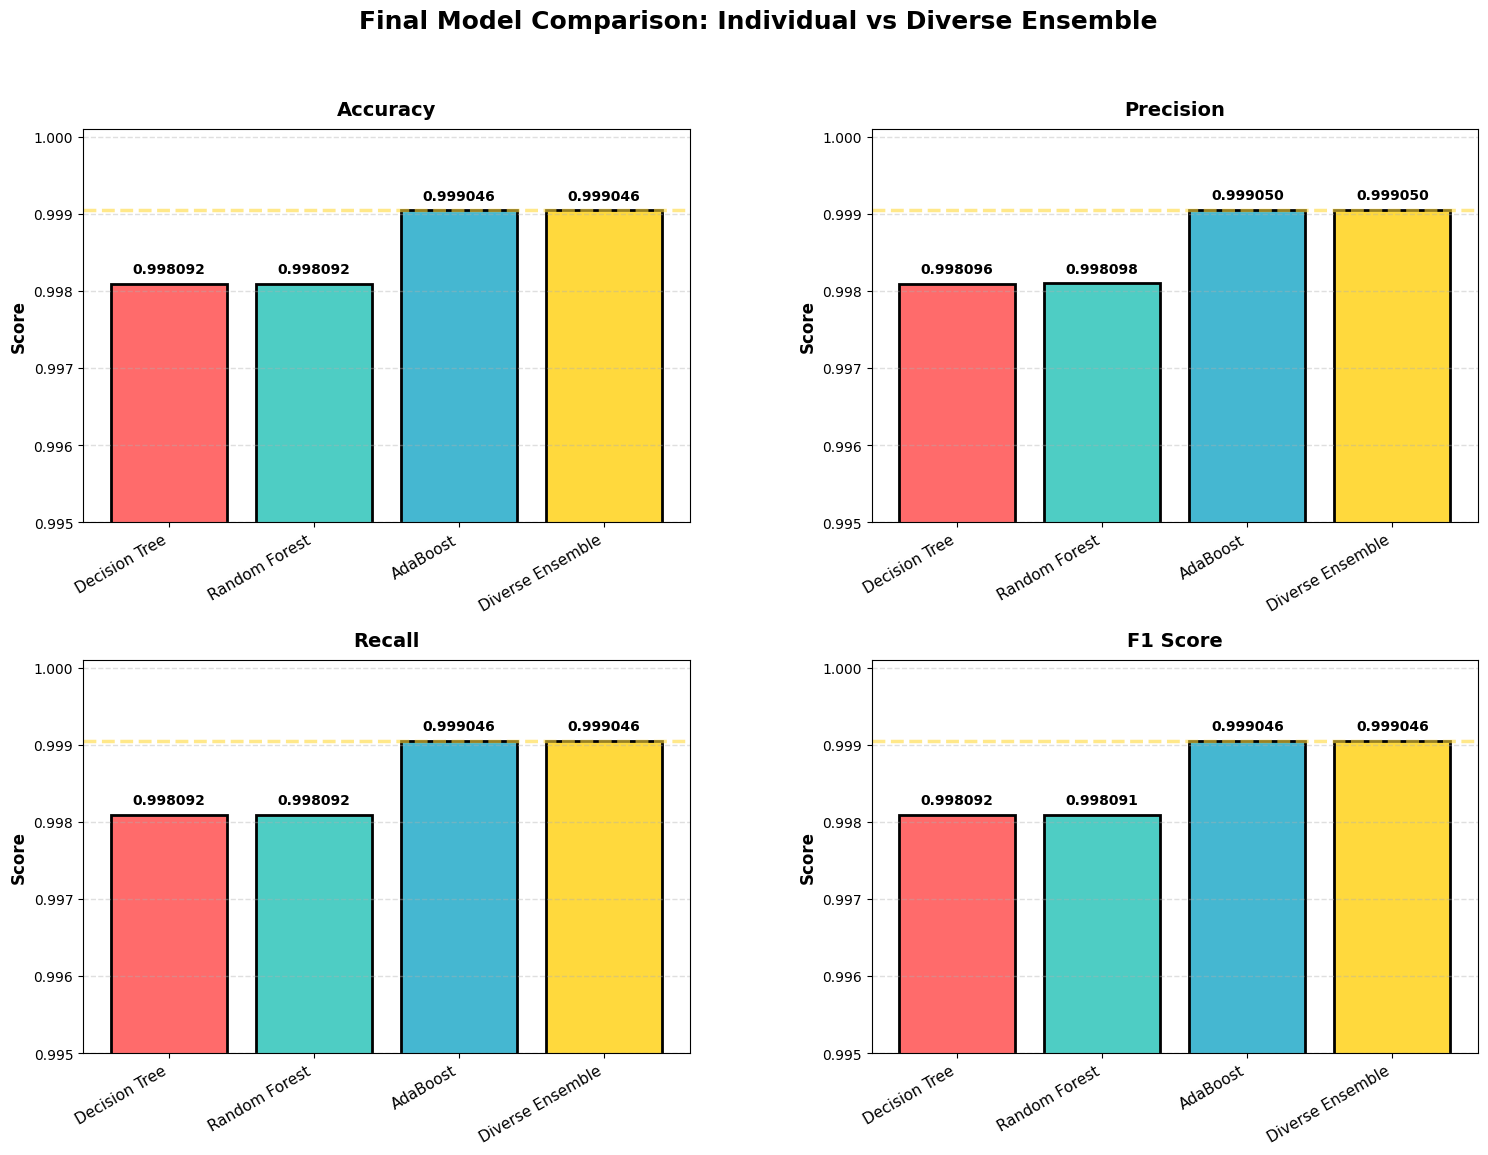

In [74]:

final_comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'Diverse Ensemble'],
    'Accuracy': [dt_accuracy, rf_accuracy, ada_accuracy, ensemble_accuracy],
    'Precision': [dt_precision, rf_precision, ada_precision, ensemble_precision],
    'Recall': [dt_recall, rf_recall, ada_recall, ensemble_recall],
    'F1 Score': [dt_f1, rf_f1, ada_f1, ensemble_f1]
})

print("\n" + final_comparison_df.to_string(index=False))

best_model_idx = final_comparison_df['F1 Score'].idxmax()
best_model = final_comparison_df.loc[best_model_idx]
print(f"\n🏅 Best Model: {best_model['Model']}")
print(f"   F1 Score: {best_model['F1 Score']:.4f}")

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)
fig.suptitle('Final Model Comparison: Individual vs Diverse Ensemble', fontsize=18, fontweight='bold', y=0.98)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = final_comparison_df['Model'].tolist()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFD93D']

for idx, metric in enumerate(metrics):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    bars = ax.bar(range(len(models)), final_comparison_df[metric].values, color=colors, edgecolor='black', linewidth=2)
    ax.set_title(f'{metric}', fontsize=14, fontweight='bold', pad=10)
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_ylim([0.995, 1.0001])
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=30, ha='right', fontsize=11)
    ax.grid(axis='y', alpha=0.4, linestyle='--', linewidth=1)
    
    for i, (bar, v) in enumerate(zip(bars, final_comparison_df[metric].values)):
        ax.text(bar.get_x() + bar.get_width()/2, v + 0.0001, f'{v:.6f}', 
                ha='center', fontweight='bold', fontsize=10, va='bottom')
        if i == 3:
            ax.axhline(y=v, color=colors[i], linestyle='--', alpha=0.6, linewidth=2.5)

plt.show()

## 9. Confusion Matrix Analysis


🔍 DIVERSE ENSEMBLE - CONFUSION MATRIX

[[231   0   0   0]
 [  0 354   0   0]
 [  1   0 235   0]
 [  0   0   0 227]]


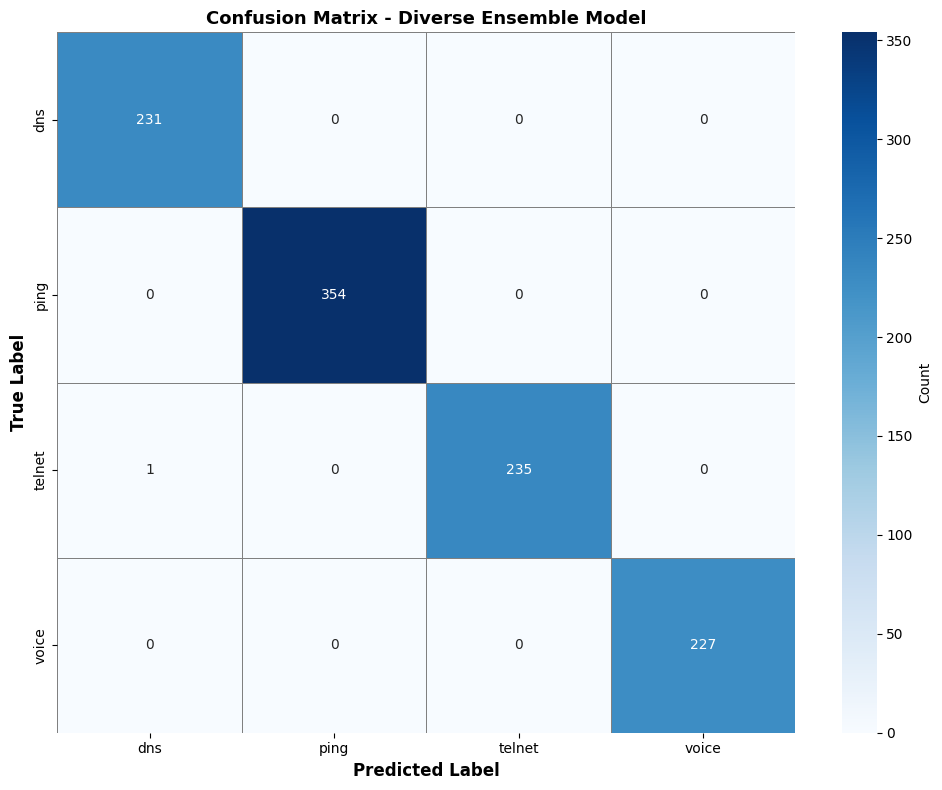


📋 Classification Report - Diverse Ensemble Model:
              precision    recall  f1-score   support

         dns       1.00      1.00      1.00       231
        ping       1.00      1.00      1.00       354
      telnet       1.00      1.00      1.00       236
       voice       1.00      1.00      1.00       227

    accuracy                           1.00      1048
   macro avg       1.00      1.00      1.00      1048
weighted avg       1.00      1.00      1.00      1048



In [ ]:

cm_ensemble = confusion_matrix(y_test, ensemble_pred)
print(f"\n{cm_ensemble}")

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_ensemble,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cbar_kws={'label': 'Count'},
    linewidths=0.5,
    linecolor='gray'
)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Diverse Ensemble Model', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📋 Classification Report - Diverse Ensemble Model:")
print(classification_report(y_test, ensemble_pred, target_names=le.classes_))

## 10. Save Models

In [ ]:

joblib.dump(ensemble_model, "ensemble_traffic_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

print("\n✅ Models Saved Successfully!")
print("   - ensemble_traffic_model.pkl")
print("   - scaler.pkl")
print("   - label_encoder.pkl")


💾 SAVING MODELS

✅ Models Saved Successfully!
   - ensemble_traffic_model.pkl
   - scaler.pkl
   - label_encoder.pkl

✅ Models Saved Successfully!
   - ensemble_traffic_model.pkl
   - scaler.pkl
   - label_encoder.pkl


## 11. Load & Test Ensemble Model

In [ ]:

ensemble_loaded = joblib.load("ensemble_traffic_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")
le_loaded = joblib.load("label_encoder.pkl")

sample_data = pd.DataFrame([[
    800, 841600, 800, 841600, 100, 100,
    84000, 84000, 300, 40000,
    290, 39000, 60, 58, 15000, 14800
]], columns=X.columns)

sample_scaled = scaler_loaded.transform(sample_data)
prediction = ensemble_loaded.predict(sample_scaled)
predicted_label = le_loaded.inverse_transform(prediction)

print(f"\n✅ Sample Prediction Results:")
print(f"   Predicted Traffic Type: {predicted_label[0]}")

probabilities = ensemble_loaded.predict_proba(sample_scaled)[0]
print(f"\n📊 Class Probabilities:")
for i, cls in enumerate(le_loaded.classes_):
    print(f"   {cls}: {probabilities[i]:.4f}")

print("\n" + "="*50)
print("✅ PIPELINE COMPLETE!")
print("="*50)


🧪 TESTING DIVERSE ENSEMBLE WITH NEW DATA

✅ Sample Prediction Results:
   Predicted Traffic Type: telnet

✅ Sample Prediction Results:
   Predicted Traffic Type: telnet

📊 Class Probabilities:
   dns: 0.0039
   ping: 0.0042
   telnet: 0.9875
   voice: 0.0044

✅ PIPELINE COMPLETE!

📊 Class Probabilities:
   dns: 0.0039
   ping: 0.0042
   telnet: 0.9875
   voice: 0.0044

✅ PIPELINE COMPLETE!
